DATA MINING & ANALYTICS (2022)

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [ ]:
NAME = "Mary Guo"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully.**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments).
    - This can typically look like taking in another argument `random_state = 42` when applicable.
- The points allotted per question is listed.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers themselves.
- If a question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out! 
- You can delete the `raise NotImplementedError()` when you are attempting the question.
- **Submitting the assignment** : Save your work as a PDF (Print -> Save as PDF), download the `.ipynb` file from Colab (Download -> Download as .ipynb), and upload these two files to Gradescope. **Run all cells before submitting.**
- **MAKE A COPY OF THIS FILE FOR YOURSELF TO EDIT/SAVE.**
- That's about it. Happy coding! 

In [ ]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

#DOWNLOADING DATASET
!wget -nc http://askoski.berkeley.edu/~zp/yelp_reviewers.csv 
# !unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv') 
df = pd.read_csv('yelp_reviewers.csv', delimiter= ',')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

--2022-09-14 15:43:19--  http://askoski.berkeley.edu/~zp/yelp_reviewers.csv
Resolving askoski.berkeley.edu (askoski.berkeley.edu)... 169.229.192.179
Connecting to askoski.berkeley.edu (askoski.berkeley.edu)|169.229.192.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35809479 (34M) [text/csv]
Saving to: ‘yelp_reviewers.csv’

yelp_reviewers.csv  100%[===================>]  34.15M  24.5MB/s    in 1.4s    

2022-09-14 15:43:21 (24.5 MB/s) - ‘yelp_reviewers.csv’ saved [35809479/35809479]

Dataset Downloaded: yelp_reviewers.csv
                q3           q4           q5           q6           q7  \
count  7177.000000  7177.000000  7177.000000  7177.000000  7177.000000   
mean      6.838651     5.281455     4.750871     8.808973     1.539160   
std       7.597977    16.208703    13.866352    19.980443     0.885421   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       3.000000     1.000000     1.000000     2.000000     1.100000   

In [ ]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0.0,0.0,0.0,0.0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0.0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. (hint: take a look at `silhouette_score`).


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters. The preferred approach for this lab is to treat the empty clusters as “singletons”, leaving them empty with single point placeholders (so no need to drop anything for the purposes of the lab).


In [ ]:
df

,user_id,q3,q4,q5,q6,q7,q8,q9,q10,q11,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
129451,kIWQXgjmVdgEs9BOgr8G5A,1,0,0,0,0.00,NaN,NaN,NaN,NaN,...,no,0.000000,13,3,0.000000,101.000000,0,0,NaN,3.000000
116706,fXU_-5DBmNlGhI8fbX-2vQ,1,0,0,0,0.00,NaN,NaN,NaN,NaN,...,no,0.000000,35,1,0.007576,23.000000,0,0,0.000000,1.000000
144394,prF_lbKywPnZhNqvJOOaDw,1,0,0,0,0.00,NaN,NaN,NaN,NaN,...,no,2.000000,36,3,0.001685,363.000000,0,0,NaN,3.000000
24699,8GHUeOm807bI5Qh4X3CHBA,1,0,0,0,0.00,NaN,NaN,NaN,NaN,...,no,0.000000,33,5,0.000000,50.000000,0,0,2.000000,5.000000
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,0.69,0.0,2.08,18.18,...,no,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88825,W5N5mS2iFofSw78ZaMKepg,3,0,0,0,1.10,NaN,NaN,NaN,NaN,...,no,0.666667,18,14,0.007430,49.000000,0,0,0.000000,4.666667
170154,zRdNM0qOX3pdYie_shKLkA,1,0,0,0,0.00,NaN,NaN,NaN,NaN,...,no,0.000000,50,2,0.000000,157.000000,0,0,NaN,2.000000
88687,W21PBCWu59Bo5LRv9-sYNg,8,0,1,5,2.08,NaN,0.0,1.61,0.00,...,no,0.250000,34,31,0.000000,36.041667,0,0,0.347826,3.875000
107905,cD9d9XFoC_bETPzjpnRj9g,9,14,11,15,2.20,2.64,2.4,2.71,35.00,...,no,0.555556,28,35,0.004566,62.851852,2,0,0.000000,3.888889


In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer. 
def q1(df):

  # YOUR CODE HERE
  best_score = -1
  best_k = 0
  for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    X = df[['q4', 'q5', 'q6']]
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    #print(score, i)
    if score > best_score:
      best_score = score
      best_k = i
      
  return best_k
print(q1(df))

2


What is the best choice of k? 

In [ ]:
# YOUR ANSWER HERE
2

2

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8. 

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q7-q10), then drop rows that have missing values.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q2(df):
   # YOUR CODE HERE
  
  best_score = -1
  best_k = 0
  for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    X = df[['q7', 'q8', 'q9', 'q10']].dropna()
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    #print(score, i)
    if score > best_score:
      best_score = score
      best_k = i
  return best_k

print(q2(df))

2


What is the best choice of k? 

In [ ]:
# YOUR ANSWER HERE
2

2

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8. 

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q11-q13), then drop rows that have missing values.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q3(df):
  best_score = -1
  best_k = 0
  for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    X = df[['q11', 'q12', 'q13']].dropna()
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    #print(score, i)
    if score > best_score:
      best_score = score
      best_k = i
  return best_k
    
  # YOUR CODE HERE
  raise NotImplementedError()

print(q3(df))

8


What is the best choice of k?

In [ ]:
# YOUR ANSWER HERE
8

8

### Question 4 `(1 point)`
Take the best clustering (i.e., best value of K) from Question 3 and using the same subset of data from q11-q13, list the number of data points in each cluster. Return your answer in dictionary form (i.e. `ans = {0: 100, 1: 200, ...}`).

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an dictionary. Eg : {0:1000,1:500,2:1460}.
def q4(df):
  kmeans = KMeans(n_clusters=8, random_state=42)
  X = df[['q11', 'q12', 'q13']].dropna()
  kmeans.fit(X)
  labels = kmeans.labels_
  X['cluster_num'] = labels.tolist()
  return X.groupby('cluster_num').size().to_dict()

In [ ]:
#This is an graded cell, do not edit
print(q4(df))

{0: 2055, 1: 3064, 2: 9962, 3: 1228, 4: 4483, 5: 3434, 6: 1632, 7: 4251}


### Question 5 `(1 point)`
Consider the best clustering from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless, etc.)?  If so, print the center of that cluster.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a list. Eg : [10, 30, 54].
def q5(df):
    
  # YOUR CODE HERE
  kmeans = KMeans(n_clusters=8, random_state=42)
  X = df[['q11', 'q12', 'q13']].dropna()
  kmeans.fit(X)
  labels = kmeans.labels_
  X['cluster_num'] = labels.tolist()
  new = X.groupby('cluster_num').agg('mean')
  new['diff_q12_q13'] = new['q12'] - new['q13']
  item = new[new['diff_q12_q13'] == max(new['diff_q12_q13'])].index[0]
  return kmeans.cluster_centers_[item]

In [ ]:
#This is a graded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

[ 1.1 98.3  0.6]


### Question 6 `(1 point)`
Consider the best clustering from Question 3. What was the centroid of the cluster that represented relatively uniform strength in all voting categories?

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a centroid in list form. Eg : [10, 10.5, 13].
def q6(df):
  kmeans = KMeans(n_clusters=8, random_state=42)
  X = df[['q11', 'q12', 'q13']].dropna()
  kmeans.fit(X)
  labels = kmeans.labels_
  X['cluster_num'] = labels.tolist()
  new = X.groupby('cluster_num').agg('mean')
  new['diff_q11_q12_q13'] = abs(new['q11'] - new['q12']) + abs(new['q12'] - new['q13']) + abs(new['q11'] - new['q13'])
  item = new[new['diff_q11_q12_q13'] == min(new['diff_q11_q12_q13'])].index[0]
  return kmeans.cluster_centers_[item]   
  # YOUR CODE HERE


In [ ]:
#This is a graded cell, do not edit
print(q6(df))

[33.32621234 32.8740678  33.79618409]


### Question 7 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a float.
def q7(df):
  kmeans = KMeans(n_clusters=5, random_state=42)
  X = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
  kmeans.fit(X)
  return silhouette_score(X, kmeans.labels_)

  # YOUR CODE HERE

In [ ]:
#This is a graded cell, do not edit
print(q7(df))

0.5481158706623568


### Question 8 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).

What is the average q3 value in each of the clusters?

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an Array. Eg : [10, 30, 54].
def q8(df):
  kmeans = KMeans(n_clusters=5, random_state=42)
  X = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
  kmeans.fit(X)
  labels = kmeans.labels_
  X['cluster_num'] = labels.tolist()
  combine = pd.concat([df, X], axis=1)
  return combine.groupby('cluster_num').agg('mean').reset_index()['q3'].tolist()
    
  # YOUR CODE HERE
  raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

[6.6 7.3 4.9 2.4 6.9]


### Question 9 `(2 points)`

We will now cluster the dataset using all features in the dataset.

We can drop features with high incidents of `-inf` / `NaN` / blank values. We will also perform some form of normalization on these features so as not to over bias the clustering towards the larger magnitude features. 

Let's go ahead and get started.


#### Data Cleansing and Normalization ####
**Check how many null values there are in each column.**

In [ ]:
# YOUR CODE HERE
df.isna().sum()

user_id        0
q3             0
q4             0
q5             0
q6             0
q7             0
q8         35280
q9         36743
q10        24338
q11        21383
q12        21383
q13        21383
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      14469
q16ac          0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values. Let's see what the impact is of removing the two columns with the most null values.

**Drop the two columns with the most NaN values, and then remove all rows with NaN values remaining.**

In [ ]:
# YOUR CODE HERE
new = df.drop(columns=['q8','q9'])
new = new.dropna()
new

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,...,no,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,...,no,1.000000,22,6,0.000000,46.500000,0,3,0.000000,3.000000
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,...,no,1.000000,37,5,0.000498,197.000000,0,0,0.000000,5.000000
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,...,no,1.400000,14,18,0.001578,167.000000,1,0,1.250000,3.600000
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,...,no,0.500000,3,30,0.009861,91.552083,1,13,4.000000,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,09cpNEc8L-jr9R8-e7cJuA,6,1,2,2,1.79,0.69,20.00,40.00,40.00,...,no,1.166667,10,16,0.001286,362.916667,0,0,2.500000,2.666667
69511,OrtDTPj1J2injmWcHyTyWw,3,1,2,8,1.10,2.08,9.09,18.18,72.73,...,no,0.666667,25,13,0.003016,60.111111,1,0,1.333333,4.333333
77193,RjjsMfDoxbwMVPi-DLvftQ,19,2,2,7,2.94,1.95,18.18,18.18,63.64,...,yes,0.315789,12,62,0.018841,41.166667,0,3,0.500000,3.263158
88687,W21PBCWu59Bo5LRv9-sYNg,8,0,1,5,2.08,1.61,0.00,16.67,83.33,...,no,0.250000,34,31,0.000000,36.041667,0,0,0.347826,3.875000


By removing two features, we have effectively doubled the number of rows remaining than if we just removed all rows with a NaN value. That's pretty good.  

Now, let's preprocess categorical variables into dummy variables. (hint: look at `pd.get_dummies`).

In [ ]:
# YOUR CODE HERE

new = pd.get_dummies(new.drop(columns=['user_id']))
new

,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,...,q16x,q16y,q16z,q16aa,q16ab,q16ac,q16s_experienced,q16s_freshman,q16t_no,q16t_yes
47453,8,2,1,8,2.08,2.08,18.18,9.09,72.73,10,...,0.001755,91.072917,4,0,1.000000,4.875000,1,0,1,0
53000,2,1,1,2,0.69,0.69,25.00,25.00,50.00,10,...,0.000000,46.500000,0,3,0.000000,3.000000,1,0,1,0
64580,1,0,0,1,0.00,0.00,0.00,0.00,100.00,5,...,0.000498,197.000000,0,0,0.000000,5.000000,1,0,1,0
84662,5,0,0,4,1.61,1.39,0.00,0.00,100.00,6,...,0.001578,167.000000,1,0,1.250000,3.600000,1,0,1,0
50079,8,8,5,13,2.08,2.56,30.77,19.23,50.00,9,...,0.009861,91.552083,1,13,4.000000,3.750000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,6,1,2,2,1.79,0.69,20.00,40.00,40.00,9,...,0.001286,362.916667,0,0,2.500000,2.666667,1,0,1,0
69511,3,1,2,8,1.10,2.08,9.09,18.18,72.73,9,...,0.003016,60.111111,1,0,1.333333,4.333333,1,0,1,0
77193,19,2,2,7,2.94,1.95,18.18,18.18,63.64,11,...,0.018841,41.166667,0,3,0.500000,3.263158,1,0,0,1
88687,8,0,1,5,2.08,1.61,0.00,16.67,83.33,8,...,0.000000,36.041667,0,0,0.347826,3.875000,1,0,1,0


Now, normalize the remaining values.

In [ ]:
# YOUR CODE HERE
for name in new.columns:
  if name not in ['q16s_experienced', 'q16s_freshman', 'q16t_no', 'q16t_yes']:
    new[name] = (new[name]-np.mean(new[name]))/np.std(new[name])
new

,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,...,q16x,q16y,q16z,q16aa,q16ab,q16ac,q16s_experienced,q16s_freshman,q16t_no,q16t_yes
47453,0.647475,-0.020350,-0.104715,0.267545,1.128456,1.241894,0.077862,-0.270110,0.129780,0.788149,...,-0.314390,0.339278,3.332133,-0.224068,-0.040004,1.122253,1,0,1,0
53000,-0.467509,-0.119229,-0.104715,-0.208344,-0.504080,-0.235769,0.454358,0.634042,-0.752622,0.788149,...,-0.570954,-0.476009,-0.379989,1.938780,-0.315454,-0.427887,1,0,1,0
64580,-0.653340,-0.218108,-0.219817,-0.287659,-1.314475,-0.969286,-0.925761,-0.786688,1.188428,-1.480354,...,-0.498224,2.276799,-0.379989,-0.224068,-0.315454,1.225596,1,0,1,0
84662,0.089983,-0.218108,-0.219817,-0.049715,0.576448,0.508377,-0.925761,-0.786688,1.188428,-1.026654,...,-0.340281,1.728067,0.548041,-0.224068,0.028859,0.068157,1,0,1,0
50079,0.647475,0.572927,0.355691,0.664119,1.128456,1.752166,0.772890,0.306138,-0.752622,0.334448,...,0.870644,0.348042,0.548041,9.148274,0.786346,0.192169,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,0.275814,-0.119229,0.010386,-0.208344,0.787855,-0.235769,0.178334,1.486480,-1.140832,0.334448,...,-0.382910,5.311596,-0.379989,-0.224068,0.373171,-0.703468,1,0,1,0
69511,-0.281679,-0.119229,0.010386,0.267545,-0.022540,1.241894,-0.423950,0.246467,0.129780,0.334448,...,-0.130041,-0.227047,0.548041,-0.224068,0.051813,0.674435,1,0,1,0
77193,2.691614,-0.020350,0.010386,0.188230,2.138514,1.103695,0.077862,0.246467,-0.223103,1.241850,...,2.183275,-0.573562,-0.379989,1.938780,-0.177729,-0.210324,1,0,0,1
88687,0.647475,-0.218108,-0.104715,0.029600,1.128456,0.742252,-0.925761,0.160655,0.541282,-0.119252,...,-0.570954,-0.667304,-0.379989,-0.224068,-0.219645,0.295511,1,0,1,0


Using the the "sum of squared errors" metric along with the elbow method (make a graph and visually examine for the elbow), what is the best k to use for this dataset? (Hint: look at the `inertia_` attribute for k-means in sklearn).

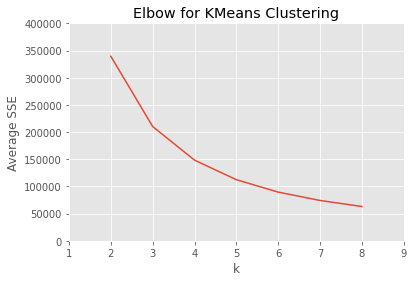

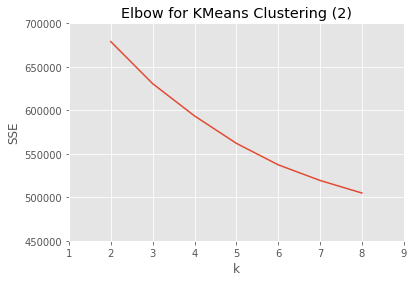

In [ ]:
# The return value should be a graph to visualize the elbow method and the value of k determined from that graph.

# YOUR CODE HERE
#The question says using the SSE, I'm not sure is to ask us to use sse without 
#transformation or we can use the average sse. However, the average sse did give us
#a better viisualization of Elbow method. 
average_score = []
x = [2,3,4,5,6,7,8]
for i in range(2, 9):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(new)
  average_score.append(kmeans.inertia_/i)

plt.title("Elbow for KMeans Clustering")
plt.ylabel("Average SSE")
plt.xlabel("k")
plt.plot(x, average_score)   
plt.xlim(1,9)
plt.ylim(0,400000)
plt.show()


score = []
x = [2,3,4,5,6,7,8]
for i in range(2, 9):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(new)
  score.append(kmeans.inertia_)

plt.title("Elbow for KMeans Clustering (2)")
plt.ylabel("SSE")
plt.xlabel("k")
plt.plot(x, score)   
plt.xlim(1,9)
plt.ylim(450000,700000)
plt.show()



**Answer: 3**

### Question 10 `(1 points)`
For this question, please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe the question you propose and how clustering can answer that question. Feel free to use additional cells if needed.


**Question: Clustered on q16h, q16k, q16n. Find the best k first. Then think
Were there clusters that represented using the word "good" a lot of times ,but very few exclamation marks?  If so, print the center of that cluster.**

In [ ]:
# YOUR CODE HERE
def q10(df):

  # YOUR CODE HERE
  best_score = -1
  best_k = 0
  for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    X = df[['q16h', 'q16k', 'q16n']]
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    #print(score, i)
    if score > best_score:
      best_score = score
      best_k = i
    
  kmeans = KMeans(n_clusters=best_k, random_state=42)
  X1 = df[['q16h', 'q16k', 'q16n']].dropna()
  kmeans.fit(X1)
  labels = kmeans.labels_
  X1['cluster_num'] = labels.tolist()
  new = X1.groupby('cluster_num').agg('mean')
  new['diff_q16n_q16h'] = new['q16n'] - new['q16h']
  item = new[new['diff_q16n_q16h'] == max(new['diff_q16n_q16h'])].index[0]
  return kmeans.cluster_centers_[item]

print(q10(df))

[1.13653334 0.33354648 0.44835514]


### **Written Answer**

**Answer:[1.13653334 0.33354648 0.44835514]** 

## Bonus question (`2 Points`) - Reviewer overlap:

Now, let's take a look back at what we were doing last week, and use that in junction with what we've learned from above today.

For this bonus question, please:
- Download last week's dataset
- Aggregate cool, funny, and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed.


**You should be returning a dataframe with the following structure in the end:**

Rows: user IDs as indices.

Columns: boolean columns describing if the user ID has a review for each of the labels determined from the K-Means clustering, a boolean column describing if the user ID has a review for all of the given labels, and a column composing of lists of cluster IDs that the given user ID has written reviews for.

In [ ]:
# YOUR CODE HERE
!wget -nc http://askoski.berkeley.edu/~zp/yelp_reviews.csv

#!unzip yelp_reviews.zip
print('Dataset Downloaded: yelp_reviews.csv')
bonus_df=pd.read_csv('yelp_reviews.csv')
bonus_df



File ‘yelp_reviews.csv’ already there; not retrieving.

Dataset Downloaded: yelp_reviews.csv


,type,business_id,user_id,stars,text,date,cool_votes,useful_votes,funny_votes
0,review,mxrXVZWc6PWk81gvOVNOUw,mv7shusL4Xb6TylVYBv4CA,4,Definitely try the duck dish. I rank it amon...,2011-06-13,0,0,0
1,review,mxrXVZWc6PWk81gvOVNOUw,0aN5QPhs-VwK2vusKG0waQ,5,Big Ass Burger was awesome! Great $5 mojitos. ...,2011-06-25,1,0,0
2,review,kK4AzZ0YWI-U2G-paAL7Fg,0aN5QPhs-VwK2vusKG0waQ,5,Unbelievable sandwiches! Good service.,2011-06-25,0,0,0
3,review,mxrXVZWc6PWk81gvOVNOUw,1JUwyYab-uJzEx_FRd81Zg,5,"Awesome, awesome, awesome! My mom and sister a...",2011-07-18,1,1,0
4,review,mxrXVZWc6PWk81gvOVNOUw,2Zd3Xy8hUVmZkNg7RyNjhg,4,I had the ribs they were great. The beer sele...,2011-07-19,1,0,1
...,...,...,...,...,...,...,...,...,...
547268,review,uJYw4p59AKh8c8h5yWMdOw,RbfDvjqqzzqT-ipvWWyPTg,2,Non smoking hotel room reeked of smoking.\nCar...,2016-07-06,0,1,0
547269,review,uJYw4p59AKh8c8h5yWMdOw,2K6zSLJy-zxLB7sqONfGvQ,3,Great location right on the strip but I defini...,2016-07-08,0,1,1
547270,review,9CLZ-Uwv3nmOlbbGCIhvrQ,2K6zSLJy-zxLB7sqONfGvQ,3,If you're staying in Planet Hollywood and look...,2016-07-08,0,1,0
547271,review,aGbjLWzcrnEx2ZmMCFm3EA,2K6zSLJy-zxLB7sqONfGvQ,4,I'm not a huge burger person but got dragged i...,2016-07-08,1,0,0


In [ ]:
def bonus(bonus_df):

  # YOUR CODE HERE
  new_df = bonus_df[['business_id', 'cool_votes','funny_votes', 'useful_votes']].groupby('business_id').agg('sum')
  kmeans = KMeans(n_clusters=3, random_state=42)
  kmeans.fit(new_df)
  labels = kmeans.labels_
  new_df['cluster_num'] = labels.tolist()
  new_df = new_df.drop(columns = ['cool_votes', 'funny_votes', 'useful_votes'])
  bonus_df1 = bonus_df.reset_index(drop =True).set_index('business_id')
  combine_df = new_df.join(bonus_df1)
  combine_df1 = combine_df.groupby(['user_id', 
                                    'cluster_num']).size().reset_index().sort_values(by = ['user_id'], 
                                    ascending=False).rename(columns={0: "Num_rev_per_cluster_user"})
  one_hot_clust = pd.get_dummies(combine_df1.cluster_num, prefix='Cluster')
  result = pd.merge(combine_df1, one_hot_clust, on=one_hot_clust.index).set_index("key_0")
  result1 = result.groupby('user_id').agg({'cluster_num' : list, 'Cluster_0': 'sum', 'Cluster_1': 'sum', 'Cluster_2': 'sum'})
  result1['hit_3_cluster'] = 0
  result1['hit_3_cluster'] = np.where((result1['Cluster_0'] == 1) & (result1['Cluster_1'] == 1) & (result1['Cluster_2'] == 1),
                                 1,result1['hit_3_cluster'])
  return result1.sort_values(by = 'user_id', ascending=True)
bonus_df = bonus(bonus_df) 

In [ ]:
#new_df = bonus_df[['business_id', 'cool_votes','funny_votes', 'useful_votes']].groupby('business_id').agg('sum')
#kmeans = KMeans(n_clusters=3, random_state=42)
#kmeans.fit(new_df)

In [ ]:
#labels = kmeans.labels_
#new_df['cluster_num'] = labels.tolist()
#new_df = new_df.drop(columns = ['cool_votes', 'funny_votes', 'useful_votes'])
#bonus_df1 = bonus_df.reset_index(drop =True).set_index('business_id')
#combine_df = new_df.join(bonus_df1)

In [ ]:
#combine_df1 = combine_df.groupby(['user_id', 'cluster_num']).size().reset_index().sort_values(by = ['user_id'], ascending=False).rename(columns={0: "Num_rev_per_cluster_user"})#.groupby('user_id').agg({'cluster_num' : list})
#combine_df1

,user_id,cluster_num,Num_rev_per_cluster_user
231193,zzyeArRv6I5HpEJlOCOPAQ,0,3
231192,zzx-JA0qEz5eTO3GMv99NA,0,1
231191,zzwu0nG0MCUP43zNSr5k-A,0,1
231190,zzvflqB4xAcKFbIbS6HSOw,2,2
231189,zzvflqB4xAcKFbIbS6HSOw,1,2
...,...,...,...
4,--8A9o_NeGyt_3kzlXtSdg,0,3
3,--82_AVgRBsLw6Dhy8sEnA,2,1
2,--2QZsyXGz1OhiD4-0FQLQ,2,2
1,--2QZsyXGz1OhiD4-0FQLQ,0,1


In [ ]:
#one_hot_clust = pd.get_dummies(combine_df1.cluster_num, prefix='Cluster')
#result = pd.merge(combine_df1, one_hot_clust, on=one_hot_clust.index).set_index("key_0")
#result1 = result.groupby('user_id').agg({'cluster_num' : list, 'Cluster_0': 'sum', 'Cluster_1': 'sum', 'Cluster_2': 'sum'})
#result1['hit_3_cluster'] = 0
#result1['hit_3_cluster'] = np.where((result1['Cluster_0'] == 1) & (result1['Cluster_1'] == 1) & (result1['Cluster_2'] == 1),
                                 #1,result1['hit_3_cluster'])
#result1

,cluster_num,Cluster_0,Cluster_1,Cluster_2,hit_3_cluster
user_id,,,,,
--1Y03CEKR3WDbBjYnsW7A,[0],1,0,0,0
--2QZsyXGz1OhiD4-0FQLQ,"[2, 0]",1,0,1,0
--82_AVgRBsLw6Dhy8sEnA,[2],0,0,1,0
--8A9o_NeGyt_3kzlXtSdg,[0],1,0,0,0
--8WbseBk1NjfPiZWjQ-XQ,[0],1,0,0,0
...,...,...,...,...,...
zzv762b871Wp3SVxsFQqHw,[0],1,0,0,0
zzvflqB4xAcKFbIbS6HSOw,"[2, 1, 0]",1,1,1,1
zzwu0nG0MCUP43zNSr5k-A,[0],1,0,0,0


In [ ]:
#This is a graded cell, do not edit
print(bonus_df.head())

                       cluster_num  Cluster_0  Cluster_1  Cluster_2  \
user_id                                                               
--1Y03CEKR3WDbBjYnsW7A         [0]          1          0          0   
--2QZsyXGz1OhiD4-0FQLQ      [2, 0]          1          0          1   
--82_AVgRBsLw6Dhy8sEnA         [2]          0          0          1   
--8A9o_NeGyt_3kzlXtSdg         [0]          1          0          0   
--8WbseBk1NjfPiZWjQ-XQ         [0]          1          0          0   

                        hit_3_cluster  
user_id                                
--1Y03CEKR3WDbBjYnsW7A              0  
--2QZsyXGz1OhiD4-0FQLQ              0  
--82_AVgRBsLw6Dhy8sEnA              0  
--8A9o_NeGyt_3kzlXtSdg              0  
--8WbseBk1NjfPiZWjQ-XQ              0  


*ⓒ Prof. Zachary Pardos, 2022*